# Testing Tight Divergence on Random MLPs - In. Domain Radius: 0

## Generate a Sequence of Random MLPs

We generate a sequence of $N = 32$ MLPs with the following characteristics:


| Input Shape | (10, 10) |
|------------|----------|
 Max. Num. Layers | 32  |
  Layer Step | 1        |
  Max. Width | 100      |
  Num. Samples | 100,000  |
  Num. Classes | 10     |
| Seed | 0 |
| In. Domain Radius | 0 |

Each element of this sequence consists of a pair $\langle \widehat{Z}_i, \widetilde{S}_i \rangle$, where $\widetilde{S}_i$ is the *tight convex approximation* of the MLP $\widehat{Z}_i$. The tight convex approximation is taken with respect to the domain $[-1, 1]^d$, where $d$ is the afore mentioned input shape.


In [1]:
import sys
sys.path.append("..")

import numpy as np
import experiments as exp

In [2]:
## Enable/Disable Titles
show_titles = False

In [3]:
Exp = exp.ConvApproxError(
    [10, 10],               # In. Shape
    31,                     # Max Num. Layers
    1,                      # layer step
    100,                    # max width
    100_000,                # number of samples
    10,                     # Num. Classes
    0,                      # Seed
    0                       # Rad
)
Exp.report()
Exp.report_architectures()

100%|██████████| 30/30 [14:13<00:00, 28.46s/it]

~~ Reporting ~~
Parameters:
_________________________________________________________________
    In. Shape.:        [10, 10]
    Num. Classes (Out. Dim.):10
    Layer Step:        1
    Max. Width:        100
    Num. Samples:      100000
    Seed:              0
    Num. Networks:     100



~~ Architectures ~~
1)  [100, 47, 10]
2)  [100, 50, 67, 10]
3)  [100, 70, 70, 12, 10]
4)  [100, 86, 24, 39, 90, 10]
5)  [100, 73, 91, 91, 15, 61, 10]
6)  [100, 68, 42, 90, 49, 91, 84, 10]
7)  [100, 40, 28, 80, 75, 12, 23, 83, 10]
8)  [100, 72, 82, 50, 67, 85, 91, 52, 32, 10]
9)  [100, 22, 22, 17, 42, 35, 68, 12, 60, 35, 10]
10) [100, 34, 77, 26, 38, 78, 58, 31, 37, 3, 3, 10]
11) [100, 39, 56, 8, 41, 20, 82, 7, 45, 61, 34, 4, 10]
12) [100, 68, 44, 60, 38, 14, 49, 85, 94, 3, 17, 56, 15, 10]
13) [100, 45, 87, 78, 71, 9, 71, 50, 6, 79, 55, 81, 18, 23, 10]
14) [100, 61, 26, 82, 16, 88, 51, 52, 72, 44, 38, 67, 98, 72, 97, 10]
15) [100, 3, 53, 39, 37, 51, 96, 6, 45, 80, 24, 76, 3, 13, 46, 61, 10]
16) [1

## Test Divergence Escalation w.r.t. Number of Layers

### Average Tight Divergence

For each of the $N$ randomly generated MLP we compute the average *tight divergence* $\mathcal{A}_i$, as in the formula below:

$$
 \mathcal{A}_i = \frac{1}{\vert D \vert} \sum_{\mathbf{x} \in D } \mathsf{dvg}_i(\mathbf{x}) = \frac{1}{\vert D\vert}\sum_{\mathbf{x} \in D} \|\widehat{Z}_i(\mathbf{x}) - \widetilde{S}_i(\mathbf{x})\|_\infty
$$

Note that for each pair $\widehat{Z}_i, \widetilde{S}_i$ we use the *same* set of randomly drawn samples $D$. In out case $N = 30$ and $\vert D \vert = 100,000$.


In [4]:
avg_tight_divergence =  Exp.comp_avg_tight_divergence()

100%|██████████| 30/30 [00:00<00:00, 137.17it/s]


**Note:** The set of random samples $D$ is computed *once* and used for each subsequent experiment, i.e. for the computation of each $\mathcal{A}_i$.

---

### Lower Bound to the Worst Case Divergence

For each of the $N$ randomly generated MLP we compute the *worst case lower bound* $\mathcal{L}_i$ given by the value:

$$
    \mathcal{L}_i = \mathsf{dvg}_i(\mathbf{0}) = \|\widehat{Z}_i(\mathbf{0}) - \widetilde{S}_i(\mathbf{0}) \|_{\infty}
$$

In [5]:
lb_tight_divergence =  Exp.comp_worst_lb_tight_divergence()

  3%|▎         | 1/30 [00:00<00:06,  4.21it/s]

  7%|▋         | 2/30 [00:00<00:07,  3.67it/s]

 10%|█         | 3/30 [00:00<00:08,  3.23it/s]

 13%|█▎        | 4/30 [00:01<00:08,  2.94it/s]

 17%|█▋        | 5/30 [00:01<00:09,  2.73it/s]

 20%|██        | 6/30 [00:02<00:09,  2.54it/s]

 23%|██▎       | 7/30 [00:02<00:09,  2.45it/s]

 27%|██▋       | 8/30 [00:03<00:09,  2.22it/s]

 30%|███       | 9/30 [00:03<00:10,  2.10it/s]

 33%|███▎      | 10/30 [00:04<00:09,  2.01it/s]

 37%|███▋      | 11/30 [00:04<00:10,  1.90it/s]

 40%|████      | 12/30 [00:05<00:11,  1.60it/s]

 43%|████▎     | 13/30 [00:06<00:11,  1.53it/s]

 47%|████▋     | 14/30 [00:06<00:10,  1.57it/s]

 50%|█████     | 15/30 [00:07<00:10,  1.43it/s]

 53%|█████▎    | 16/30 [00:08<00:09,  1.45it/s]

 57%|█████▋    | 17/30 [00:09<00:09,  1.41it/s]

 60%|██████    | 18/30 [00:09<00:08,  1.44it/s]

 63%|██████▎   | 19/30 [00:10<00:07,  1.42it/s]

 67%|██████▋   | 20/30 [00:11<00:07,  1.39it/s]

 70%|███████   | 21/30 [00:12<00:06,  1.32it/s]

 73%|███████▎  | 22/30 [00:12<00:06,  1.31it/s]

 77%|███████▋  | 23/30 [00:13<00:05,  1.24it/s]

 80%|████████  | 24/30 [00:14<00:04,  1.24it/s]

 83%|████████▎ | 25/30 [00:15<00:04,  1.21it/s]

 87%|████████▋ | 26/30 [00:16<00:03,  1.18it/s]

 90%|█████████ | 27/30 [00:17<00:02,  1.16it/s]

 93%|█████████▎| 28/30 [00:18<00:01,  1.14it/s]

 97%|█████████▋| 29/30 [00:19<00:00,  1.13it/s]

100%|██████████| 30/30 [00:20<00:00,  1.49it/s]


---

### Upper Bound to the Worst Case Divergence

For each of the $N$ randomly generated MLP we compute the *worst case upper bound* $\mathcal{U}_i$ given by the value:

$$
    \mathcal{U}_i = \max_{\mathbf{x} \in I} \|\widetilde{S}_i(\mathbf{\mathbf{x}}) \|_{\infty}
$$

Above, $I = [-1, 1]^d$, the input domain.

In [6]:
ub_tight_divergence = Exp.comp_worst_ub_tight_divergence()

100%|██████████| 30/30 [00:00<00:00, 109.07it/s]


---

### Ploting Average, and Worst Case UB, LB for each Network

The *worst case error* $\mathcal{E}(\cdot)$ is the maximum value the tight divergence can take, w.r.t. the input interval. In particular, we have:
$$
    \mathcal{E}_i(\widehat{Z}) = \sup_{\mathbf{x} \in I} \mathsf{dvg}(\mathbf{x}).
$$
Note that we *cannot* compute the worst case error directly. However, we have,
$$
    \mathcal{L}_i, \mathcal{A}_i \leq \mathcal{E}_i \leq \mathcal{U}_i.
$$
From our experiments we observe that $\mathcal{L}_i \geq \mathcal{A}_i$. Therefore the theoretical lower bound is a *better* approximation to the worst case approximation, than the experimentaly observed average tight divergence.

In [7]:
import matplotlib.pyplot as plt

## x-axis
layers = [l for l in range(Exp.layer_step, Exp.max_num_layers, Exp.layer_step)]
#print("Layers", layers, "-- len:", len(layers))

/tmp/ipykernel_43187/3476248346.py:14: RuntimeWarning: divide by zero encountered in log10
  np.log10(lb_tight_divergence),


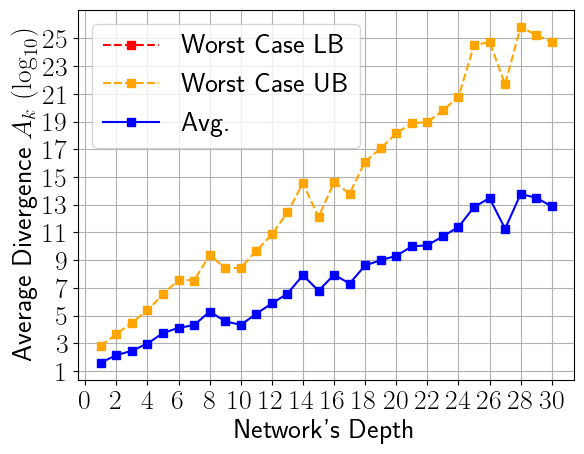

In [12]:
## Latex
plt.rcParams['text.usetex'] = True

## log plots
plt.rcParams.update({'font.size': 20})

ax = plt.axes()

space=2
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))

plt.plot(
    layers,
    np.log10(lb_tight_divergence),
    label="Worst Case LB",
    linestyle = "--",
    color = "red",
    marker = "s"
)
plt.plot(
    layers,
    np.log10(ub_tight_divergence),
    label="Worst Case UB",
    linestyle = "--",
    color = "orange",
    marker = "s"
)
plt.plot(
    layers,
    np.log10(avg_tight_divergence),
    label="Avg.",
    linestyle = "-",
    color = "blue",
    marker = "s"
)

#plt.xticks(layers)
plt.legend()
plt.grid(True)
if show_titles: plt.title("Convex Approximation Error\n (Log10 Scale)")
plt.ylabel("Average Divergence $A_k$ $(\log_{10})$")
plt.xlabel("Network's Depth")

plt.xticks(np.arange(0, 32, space))
plt.yticks(np.arange(1, np.max(np.log10(ub_tight_divergence)), space))
#ax.set(xlim=(0, 30), ylim=(3, 33))
plt.show()

/tmp/ipykernel_43187/3581065429.py:14: RuntimeWarning: divide by zero encountered in log10
  np.log10(lb_tight_divergence[min_num_layer_plot:max_num_layer_plot]),


Text(0.5, 0, "Network's Depth")

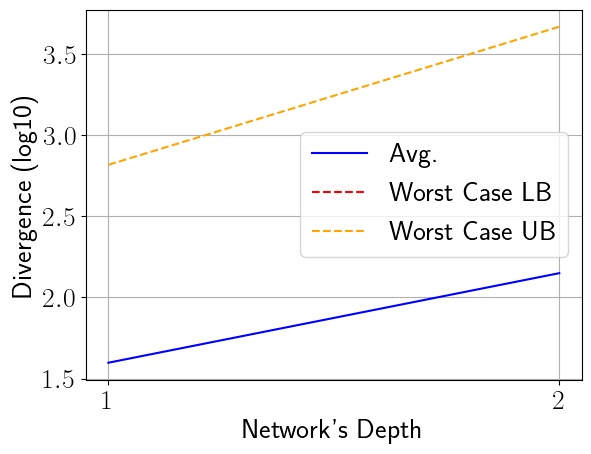

In [9]:
## log plots
min_num_layer_plot = 0
max_num_layer_plot = 2
plt.plot(
    layers[min_num_layer_plot:max_num_layer_plot],
    np.log10(avg_tight_divergence[min_num_layer_plot:max_num_layer_plot]),
    label="Avg.",
    linestyle = "-",
    color = "blue",
    #marker="s",
)
plt.plot(
    layers[min_num_layer_plot:max_num_layer_plot],
    np.log10(lb_tight_divergence[min_num_layer_plot:max_num_layer_plot]),
    label="Worst Case LB",
    linestyle = "--",
    color = "red"
)
plt.plot(
    layers[min_num_layer_plot:max_num_layer_plot],
    np.log10(ub_tight_divergence[min_num_layer_plot:max_num_layer_plot]),
    label="Worst Case UB",
    linestyle = "--",
    color = "orange"
)

plt.xticks(layers[min_num_layer_plot:max_num_layer_plot])
plt.legend()
plt.grid(True)

if show_titles: plt.title("Convex Approximation Error (Log10 Scale)\n [Zoomed In]")

plt.ylabel("Divergence (log10)")
plt.xlabel("Network's Depth")

### Ratios

#### Ratio between Avg. Div. and Worst Case LB

/tmp/ipykernel_43187/508474808.py:8: RuntimeWarning: divide by zero encountered in divide
  np.array(avg_tight_divergence) / np.array(lb_tight_divergence),


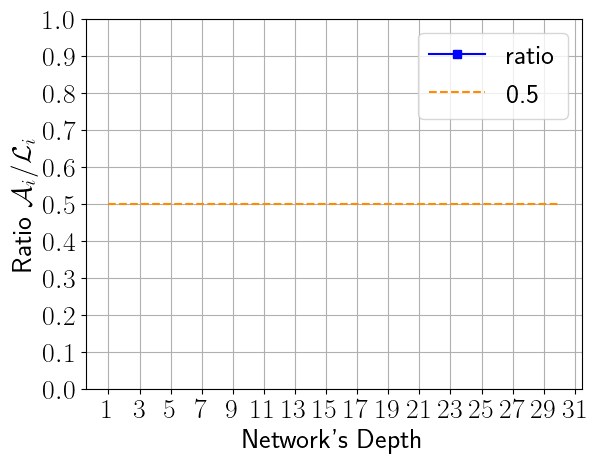

In [10]:
## Latex
plt.rcParams['text.usetex'] = True

space=2
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))
plt.plot(
    layers,
    np.array(avg_tight_divergence) / np.array(lb_tight_divergence),
    label = "ratio",
    linestyle = "-",
    color = "blue",
    marker = "s"
)
plt.plot(
    layers,
    0.5 * np.ones(len(layers),),
    label = "0.5",
    linestyle = "--",
    color = "Darkorange"
)

plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 32, space))
plt.yticks(np.arange(0, 1.1, 0.1))
if show_titles: plt.title("Ratio between Avg. Div. and Worst Case LB")
plt.ylabel("Ratio $\mathcal{A}_i / \mathcal{L}_i$")
plt.xlabel("Network's Depth")
ax.set(xlim=(1, 31), ylim=(0, 1))
plt.show()

#### Ratio between Avg. Div. and Worst Case UB

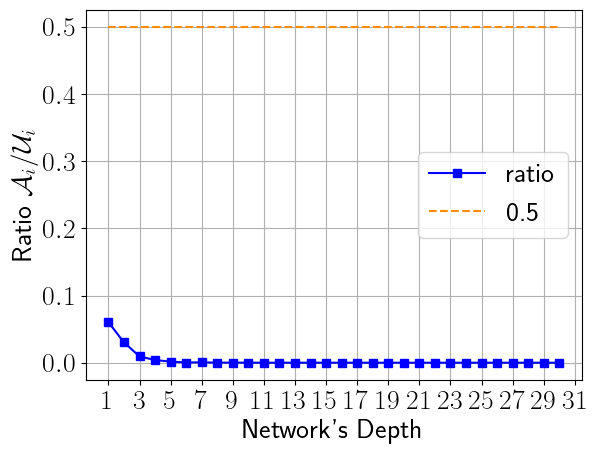

In [11]:
space=2
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))
plt.plot(
    layers,
    avg_tight_divergence /
    np.array(ub_tight_divergence),
    label = "ratio",
    linestyle = "-",
    color = "blue",
    marker = "s"
)
plt.plot(
    layers,
    0.5 * np.ones(len(layers),),
    label = "0.5",
    linestyle = "--",
    color = "Darkorange"
)

plt.legend()
plt.grid(True)
plt.xticks(np.arange(1, 32, space))
#plt.yticks(np.arange(0, 1.1, 0.1))
if show_titles: plt.title("Ratio between Avg. Div. and Worst Case UB")
plt.ylabel("Ratio $\mathcal{A}_i / \mathcal{U}_i$")
plt.xlabel("Network's Depth")
ax.set(xlim=(1, 31), ylim=(0, 1))
plt.show()